<a href="https://colab.research.google.com/github/Rivenception/CSC521_Algorithms/blob/main/Research_Project/FF_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data source
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Building the Feed-Forward Neural Network Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

all_pollution_data = pd.read_csv("/content/drive/My Drive/FFNN_Taiwain_2009_2011.csv")

#show the first 5 rows of DataFrame
all_pollution_data.head()

# PM2.5 column only
X = all_pollution_data.drop(['PM2.5'],axis=1).values
Y = all_pollution_data[['PM2.5']].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

def create_model(learning_rate, dropout_rate):
  model = Sequential()
  #Creating a Hidden layer with 100 neurons, 11 inputs, and applying the sigmoid activation function
  model.add(Dense(100, input_dim=11, activation='sigmoid'))
  #Dropping out a percentage of the inputs randomly during each training epoch to prevent overfitting
  model.add(Dropout(dropout_rate))
  model.add(Dense(50, activation='sigmoid'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(25, activation='sigmoid'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation='linear'))
  adam = Adam(learning_rate=learning_rate)
  model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])
  return model

dropout_rate = 0.1

epochs = 50
learn_rate = 0.001
model = create_model(learn_rate, dropout_rate)

model_history = model.fit(X_train, Y_train, batch_size= 1, epochs=epochs, validation_split=0.2, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy with Mean Absolute Error:', score[1])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 331.3919 - mae: 14.3193 - val_loss: 183.7796 - val_mae: 9.9509
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 168.7201 - mae: 9.2703 - val_loss: 138.0046 - val_mae: 8.5629
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 143.6279 - mae: 8.8158 - val_loss: 127.7456 - val_mae: 8.3437
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 154.6007 - mae: 8.5304 - val_loss: 83.6499 - val_mae: 6.0946
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 69.0498 - mae: 5.4806 - val_loss: 62.3121 - val_mae: 5.2141
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 65.4118 - mae: 5.5047 - val_loss: 52.3457 - val_mae: 4.9395
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 54.3137 - mae: 5.1476 - val_loss: 46.6264 - val_mae: 4.7823
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51.1359 - mae: 4.8344 - val_loss: 47.7316 - val_mae: 5.2501
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 

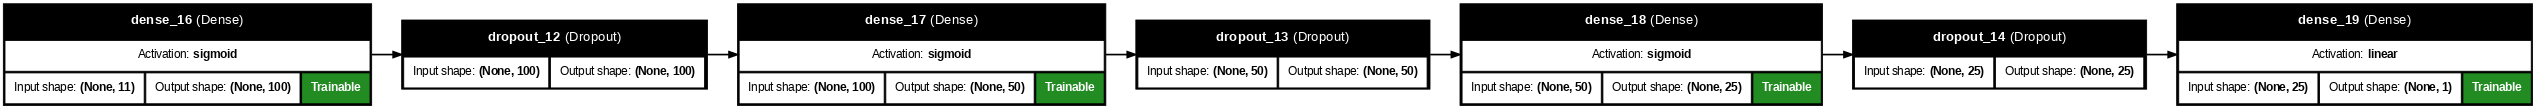

In [ ]:
#Visually mapping the data shape and training actions of the Neural Network
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, \
           show_layer_activations=True, show_trainable=True, dpi=60, rankdir='LR')

Text(0.5, 0, 'Epoch')

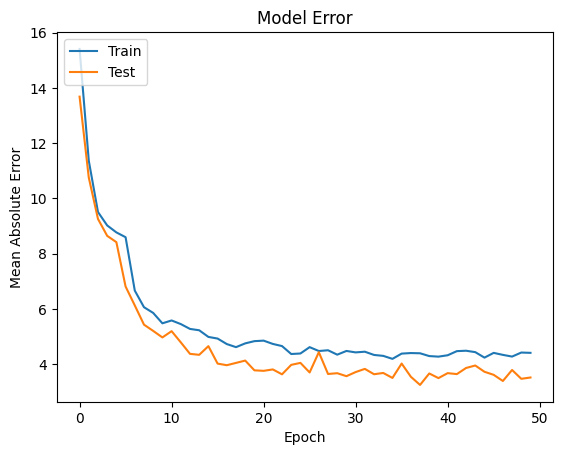

In [ ]:
#Plot the model in a graph
import matplotlib.pyplot as plt

plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.legend(['Train', 'Test'], loc='upper left')
plt.title('Model Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')

In [ ]:
#Running a Prediction
X_new = ([[12.67, 0.31, 1.32, 8.38, 9.70, 33.69, 57.83, 57.45, 4.66, 272.78, 3.02]])
X_new = np.array(X_new)

prediction = model.predict(X_new)
print("The Expected Prediction Value: 30.13")
print("The PM 2.5 would be:",prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
The Expected Prediction Value: 30.13
The PM 2.5 would be: [[29.37283]]
